In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data

C:\Users\Shin\Anaconda3\envs\tensorflow_windows\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets('./inputs/mnist')

Extracting ./inputs/mnist\train-images-idx3-ubyte.gz
Extracting ./inputs/mnist\train-labels-idx1-ubyte.gz
Extracting ./inputs/mnist\t10k-images-idx3-ubyte.gz
Extracting ./inputs/mnist\t10k-labels-idx1-ubyte.gz


# Inspecting

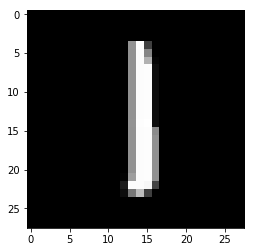

In [3]:
plt.imshow(mnist.train.images[12].reshape(28, 28), cmap='gray')

# Building a generator

- takes inputs z
- applies leaky relu activation function
- outputs result as it's a generator

In [4]:
# Resetting TF Graph
tf.reset_default_graph()
def generator(z, reuse=None):
    with tf.variable_scope('gen', reuse=reuse):
        
        alpha = 0.1
        hidden1 = tf.layers.dense(inputs=z, units=128)
        # TODO: Please use https://www.tensorflow.org/api_docs/python/tf/nn/leaky_relu
        hidden1 = tf.maximum(alpha*hidden1, hidden1)
        
        hidden2 = tf.layers.dense(inputs=hidden1, units=128)
        hidden2 = tf.maximum(alpha*hidden2, hidden2)
        
        output = tf.layers.dense(hidden2, units=784, activation=tf.nn.tanh)
        
        return output

# Building a descriminator

In [5]:
def descriminator(X, reuse=None):
    with tf.variable_scope('dis', reuse=reuse):
        
        alpha = 0.1
        hidden1 = tf.layers.dense(inputs=X, units=256)
        # TODO: Please use https://www.tensorflow.org/api_docs/python/tf/nn/leaky_relu
        hidden1 = tf.maximum(alpha*hidden1, hidden1)
        
        hidden2 = tf.layers.dense(inputs=hidden1, units=256)
        hidden2 = tf.maximum(alpha*hidden2, hidden2)
        
        logits = tf.layers.dense(hidden2, units=1)
        output = tf.sigmoid(logits)
        return output, logits

In [6]:
# Generator placeholders
real_images = tf.placeholder(tf.float32, shape=[None, 784])
z = tf.placeholder(tf.float32, shape=[None, 100])

In [7]:
G = generator(z)

In [8]:
D_output_real, D_logits_real = descriminator(real_images)

In [9]:
D_output_fake, D_logits_fake = descriminator(G, reuse=True)

In [10]:
# Losses helper function

def loss_func(logits_in, labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits=logits_in, labels=labels_in))

In [11]:
D_real_loss = loss_func(D_logits_real, tf.ones_like(D_logits_real) * 0.9)
D_fake_loss = loss_func(D_logits_fake, tf.zeros_like(D_logits_real))

In [12]:
D_loss = D_real_loss + D_fake_loss

In [13]:
G_loss = loss_func(D_logits_fake, tf.ones_like(D_logits_fake))

In [14]:
learning_rate = 0.001

In [15]:
tvars = tf.trainable_variables()

d_vars = [var for var in tvars if 'gen' in var.name]
g_vars = [var for var in tvars if 'dis' in var.name]

In [16]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss, var_list=d_vars)

In [17]:
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list=g_vars)

In [18]:
d_vars

[<tf.Variable 'gen/dense/kernel:0' shape=(100, 128) dtype=float32_ref>,
 <tf.Variable 'gen/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'gen/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'gen/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'gen/dense_2/kernel:0' shape=(128, 784) dtype=float32_ref>,
 <tf.Variable 'gen/dense_2/bias:0' shape=(784,) dtype=float32_ref>]

In [19]:
g_vars

[<tf.Variable 'dis/dense/kernel:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'dis/dense/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dis/dense_1/kernel:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'dis/dense_1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dis/dense_2/kernel:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'dis/dense_2/bias:0' shape=(1,) dtype=float32_ref>]

In [20]:
# Hyperparams
batch_size = 100
epochs = 30
init = tf.global_variables_initializer()
samples = []

In [21]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        # Calculating how many batches does it take to go through all the examples
        num_batches = mnist.train.num_examples // batch_size
        
        for i in range(num_batches):
            batch = mnist.train.next_batch(batch_size)
            
            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images * 2 - 1
            
            batch_z = np.random.uniform(-1, 1, size=(batch_size, 64))
            
            _ = sess.run(D_trainer, feed_dict={real_images: batch_images, z: batch_z})
            _ = sess.run(G_trainer, feed_dict={z: batch_z})
        print('ON EPOCH {}'.format(epoch))
        
        sample_z = np.random.uniform(-1, 1, size=(1, 100))
        gen_sample = sess.run(generator(z, reuse=True), feed_dict={z: sample_z})
        
        samples.append(gen_sample)
    save_path = saver.save(sess, "./model.ckpt")
    print("Model saved in path: %s" % save_path)

ON EPOCH 0
ON EPOCH 1
ON EPOCH 2
ON EPOCH 3
ON EPOCH 4
ON EPOCH 5
ON EPOCH 6
ON EPOCH 7
ON EPOCH 8
ON EPOCH 9
ON EPOCH 10
ON EPOCH 11
ON EPOCH 12
ON EPOCH 13
ON EPOCH 14
ON EPOCH 15
ON EPOCH 16
ON EPOCH 17
ON EPOCH 18
ON EPOCH 19
ON EPOCH 20
ON EPOCH 21
ON EPOCH 22
ON EPOCH 23
ON EPOCH 24
ON EPOCH 25
ON EPOCH 26
ON EPOCH 27
ON EPOCH 28
ON EPOCH 29


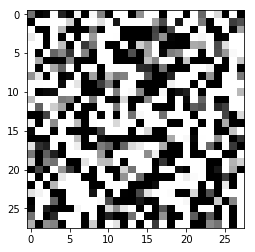

In [31]:
# Still pretty noisy
plt.imshow(samples[29].reshape(28, 28), cmap='gray')

In [115]:
saver = tf.train.Saver(var_list=g_vars)